In [ ]:
!pip install -U sentence-transformers

In [ ]:
!pip install umap-learn hdbscan

## Extract embeddings

In [30]:
"""
This is a simple application for sentence embeddings: clustering

Sentences are mapped to sentence embeddings and then k-mean clustering is applied.
"""
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
import numpy as np

embedder = SentenceTransformer('all-MiniLM-L6-v2')
tag_df = pd.read_csv('/content/user_tags.csv')

# Corpus with example sentences
corpus = list(tag_df.tag_name.to_numpy())
corpus_embeddings = embedder.encode(corpus)
print(corpus_embeddings)

[[-0.15970999  0.080475   -0.0243452  ...  0.0129841  -0.01672355
   0.03699573]
 [-0.0648718   0.02554537  0.03683445 ... -0.01126001  0.06955918
  -0.0184425 ]
 [ 0.02795298  0.08739809 -0.02349244 ...  0.01640987  0.05320405
   0.01825774]
 ...
 [-0.0989553   0.08789587 -0.03634284 ... -0.02400517  0.03099344
   0.0457946 ]
 [-0.01877031  0.05677099 -0.05227696 ... -0.04222667  0.04029132
  -0.03759535]
 [-0.02083639 -0.0120462  -0.0025414  ...  0.04154301 -0.04596369
  -0.03324768]]


## K-Means clustering

In [ ]:
# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
cluster_range = range(1, 15)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(corpus_embeddings)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [37]:

# Perform kmean clustering
num_clusters = 9
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)

tag_df['kmeans_clusters'] = clustering_model.labels_

kmeans_tags = tag_df.groupby(['kmeans_clusters'])['tag_name'].agg(list).reset_index()
for index, row in kmeans_tags.iterrows():
    print(f"Cluster {row['kmeans_clusters']}: {row['tag_name']}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: ['social security contributions']
Cluster 1: ["didn't know I was hired ", 'I was moved to another team', 'what was expected of me', 'I felt I was failing', ' I felt this was the moment I would be fired']
Cluster 2: ['discriminated', 'over compensating', 'efforts and inputs to justify', 'flawed', 'unjust and unfair', 'pay too much']
Cluster 3: ['not paying', 'contribute more', 'contribute', 'risk', 'promotion']
Cluster 4: ['job', 'tech', 'consultant contract', 'internal employee ', 'employment', 'unemployment', 'communication', 'startup ', 'getting exausted', 'performance', 'intentions of the management', 'new country', 'small startup.', 'open position', 'recruiting process', 'administrative requirement', 'outside of the office', 'excessive experience', 'HR', 'contract signing process', 'no clearly defined tasks ']
Cluster 5: ["I didn't get any feedback", " I didn't know what else to do", 'without a reply', 'without feedback']
Cluster 6: ['psychological impact', 'different', 

## Hierarchical clustering (agglomerative)

In [38]:

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform agglomerative clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)

tag_df['agg_clusters'] = clustering_model.labels_

agg_tags = tag_df.groupby(['agg_clusters'])['tag_name'].agg(list).reset_index()
for index, row in agg_tags.iterrows():
    print(f"Cluster {row['agg_clusters']}: {row['tag_name']}")

Cluster 0: ['discriminated', 'psychological impact', 'over compensating', 'efforts and inputs to justify', 'getting exausted', 'intentions of the management', 'unjust and unfair', 'excessive experience', 'no clearly defined tasks ']
Cluster 1: ['my manager was not the one who interviewed me', "didn't know I was hired ", 'what was expected of me', " I didn't know what else to do", 'I felt I was failing', '2 times he cancelled our 1-1 meeting', ' I felt this was the moment I would be fired']
Cluster 2: ['social security contributions', 'contribute more', 'contribute']
Cluster 3: ['tech', 'different', 'uncertainties', 'performance', 'flawed', 'open position', 'perfect match', 'age', 'risk']
Cluster 4: ['job', 'employment', 'unemployment', 'recruiting process', 'rejected', 'promotion', 'HR']
Cluster 5: ['internal employee ', 'administrative requirement', 'outside of the office']
Cluster 6: ["I didn't get any feedback", 'without a reply', 'without feedback']
Cluster 7: ['start a new life in

## HDBSCAN

In [39]:
import umap
import hdbscan

umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(corpus_embeddings)
cluster = hdbscan.HDBSCAN(min_cluster_size=2,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

tag_df['hdbscan_clusters'] = cluster.labels_

hdbscan_tags = tag_df.groupby(['hdbscan_clusters'])['tag_name'].agg(list).reset_index()
for index, row in hdbscan_tags.iterrows():
    print(f"Cluster {row['hdbscan_clusters']}: {row['tag_name']}")

Cluster -1: ['job', 'tech', 'discriminated', 'efforts and inputs to justify', 'different', 'communication', 'uncertainties', 'startup ', 'I was moved to another team', " I didn't know what else to do", 'flawed', 'small startup.', 'pay too much', 'promotion', 'no clearly defined tasks ']
Cluster 0: ['consultant contract', 'internal employee ', 'employment', 'unemployment', 'intentions of the management', 'open position', 'recruiting process', 'administrative requirement', 'outside of the office', 'HR', 'contract signing process']
Cluster 1: ['laid off', 'garden leave', 'laid off']
Cluster 2: ['not paying', 'social security contributions', 'contribute more', 'contribute']
Cluster 3: ['over compensating', 'unjust and unfair']
Cluster 4: ["I didn't get any feedback", 'without a reply', 'performance', 'perfect match', 'rejected', 'without feedback', 'age']
Cluster 5: ['psychological impact', 'risk']
Cluster 6: [' language barrier', ' German language skills']
Cluster 7: ['start a new life in

In [ ]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(corpus_embeddings)
tag_df = pd.concat([tag_df.drop(['x', 'y'], axis=1, errors='ignore'), pd.DataFrame(umap_data, columns=['x', 'y'])], axis=1)

In [55]:
tag_df.to_csv('clustering_results.csv')

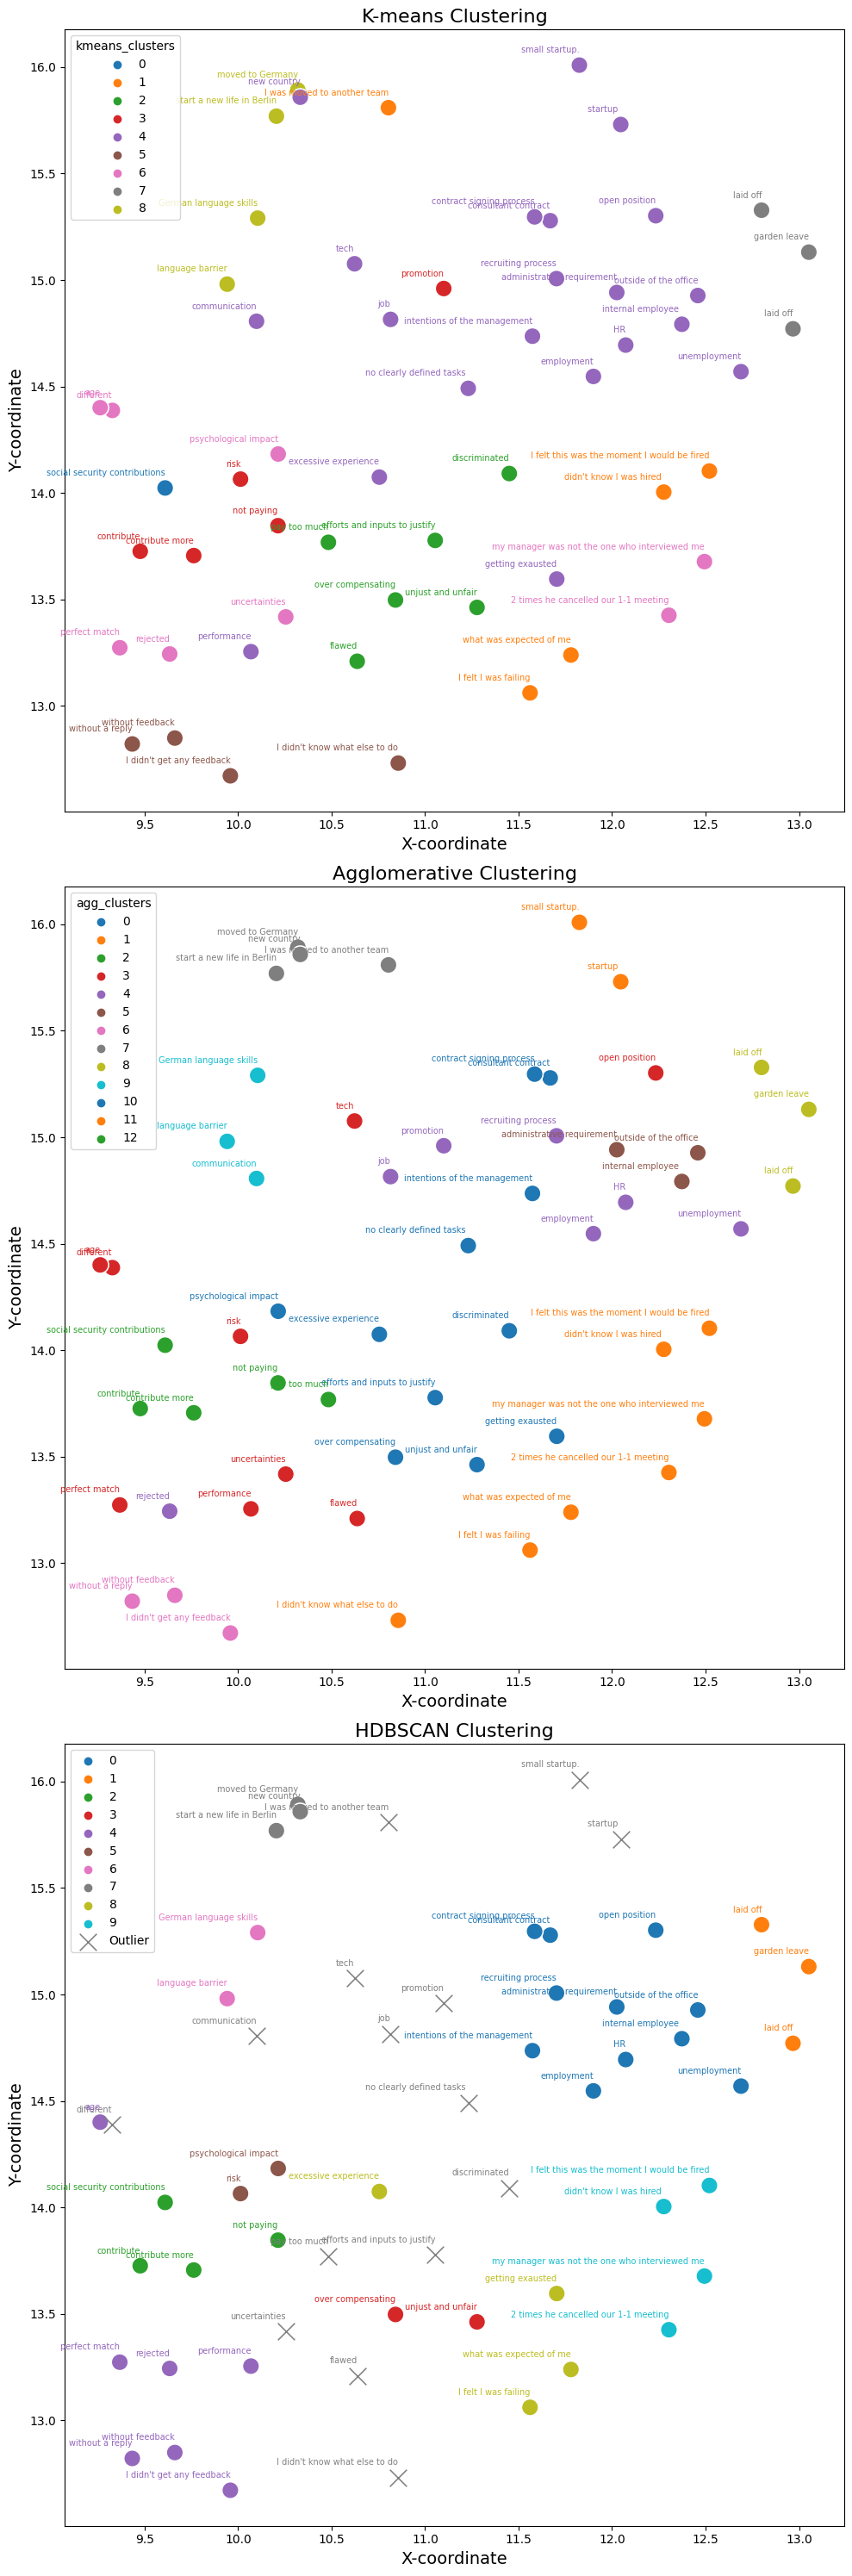

In [66]:
import seaborn as sns
# Initialize the figure
fig, axes = plt.subplots(3, 1, figsize=(10, 30))

clustering_algorithms = ['kmeans_clusters', 'agg_clusters', 'hdbscan_clusters']
titles = ['K-means Clustering', 'Agglomerative Clustering', 'HDBSCAN Clustering']

# Loop to create scatter plots for each clustering algorithm
for ax, column, title in zip(axes, clustering_algorithms, titles):
    # Determine the number of unique clusters (ignoring the outlier label for HDBSCAN)
    n_clusters = len(tag_df[tag_df[column] != -1][column].unique())

    # Generate a color palette based on the number of clusters
    palette = sns.color_palette('tab10', n_colors=n_clusters)

    # Special handling for HDBSCAN to separate out the outliers (cluster -1)
    if column == 'hdbscan_clusters':
        sns.scatterplot(x='x', y='y', hue=column, palette=palette, data=tag_df[tag_df[column] != -1], s=200, legend="full", marker='o', ax=ax)
        sns.scatterplot(x='x', y='y', color='gray', data=tag_df[tag_df[column] == -1], s=200, marker='x', ax=ax, label='Outlier')
    else:
        sns.scatterplot(x='x', y='y', hue=column, palette=palette, data=tag_df, s=200, legend="full", marker='o', ax=ax)

    # Annotate each point with the tag name, using the same color as the point
    for i in range(tag_df.shape[0]):
        if column == 'hdbscan_clusters' and tag_df[column][i] == -1:
            cluster_color = 'gray'
        else:
            cluster_color = palette[tag_df[column][i] if tag_df[column][i] != -1 else 0]  # Default to first color if index is -1
        ax.text(tag_df.x[i], tag_df.y[i]+0.05, tag_df.tag_name[i], fontsize=7, ha='right', va='bottom', color=cluster_color)

    # Set plot title and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X-coordinate', fontsize=14)
    ax.set_ylabel('Y-coordinate', fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()
